In [1]:
#x是特征，y是标签
from sklearn import datasets
import numpy as np

x, y = datasets.make_moons(n_samples=50000, noise=0.3, random_state=42)
print(x.shape)
print(y.shape)
print(np.unique(y))

(50000, 2)
(50000,)
[0 1]


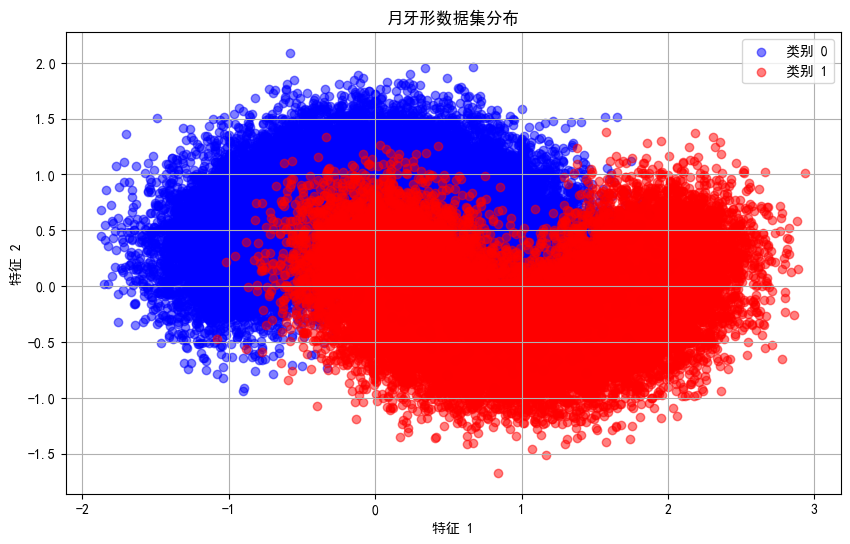

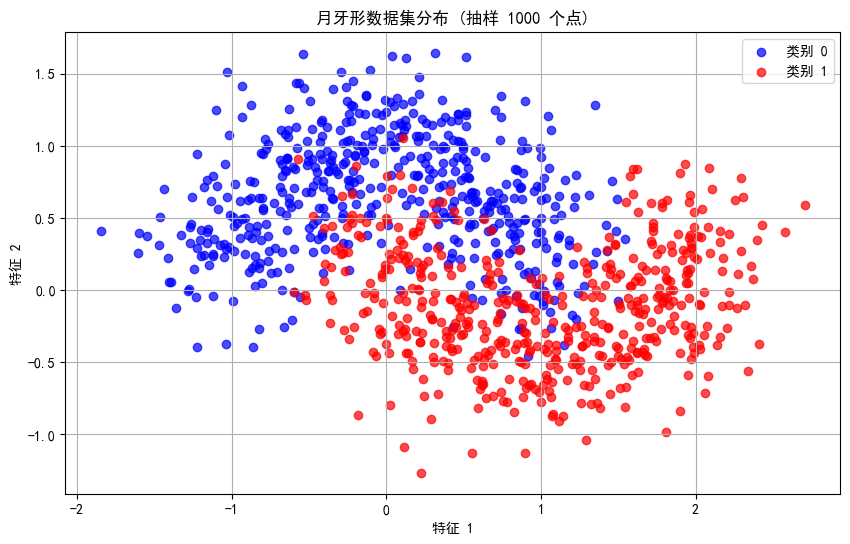

In [2]:
# 导入必要的库
import matplotlib.pyplot as plt

# 将样本数据可视化
# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.figure(figsize=(10, 6))
#x[y == 0, 0]表示y为0的样本的第一个特征，x[y == 0, 1]表示y为0的样本的第二个特征
plt.scatter(x[y == 0, 0], x[y == 0, 1], color='blue', alpha=0.5, label='类别 0')
#x[y == 1, 0]表示y为1的样本的第一个特征，x[y == 1, 1]表示y为1的样本的第二个特征
plt.scatter(x[y == 1, 0], x[y == 1, 1], color='red', alpha=0.5, label='类别 1')
plt.title('月牙形数据集分布')
plt.xlabel('特征 1')
plt.ylabel('特征 2')
plt.legend()
plt.grid(True)
plt.show()

# 为了更好地理解数据分布，我们也可以只绘制一部分样本点
sample_size = 1000
plt.figure(figsize=(10, 6))
plt.scatter(x[:sample_size][y[:sample_size] == 0, 0], x[:sample_size][y[:sample_size] == 0, 1], 
            color='blue', alpha=0.7, label='类别 0')
plt.scatter(x[:sample_size][y[:sample_size] == 1, 0], x[:sample_size][y[:sample_size] == 1, 1], 
            color='red', alpha=0.7, label='类别 1')
plt.title('月牙形数据集分布 (抽样 {} 个点)'.format(sample_size))
plt.xlabel('特征 1')
plt.ylabel('特征 2')
plt.legend()
plt.grid(True)
plt.show()


# 并行集成学习实战

开始训练基分类器...
基分类器训练完成！
逻辑回归分类器准确率: 0.8535
SVC分类器准确率: 0.9123
决策树分类器准确率: 0.9054
投票分类器准确率: 0.9079


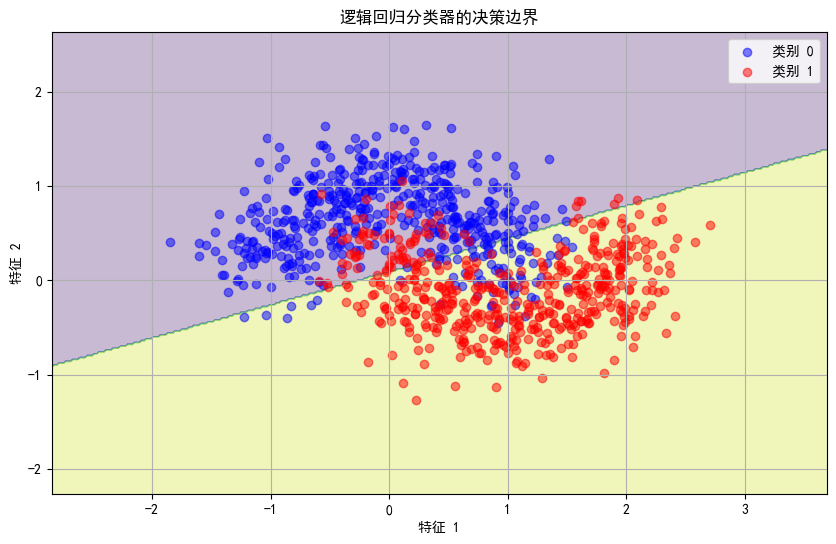

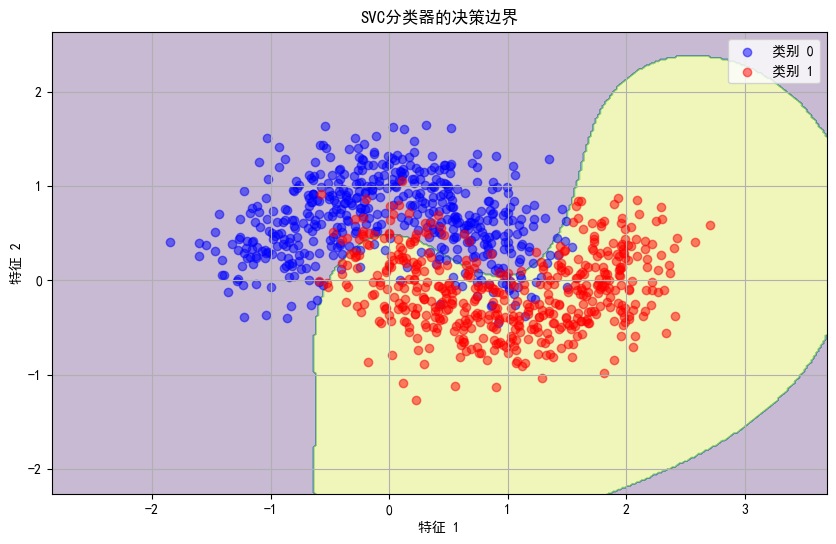

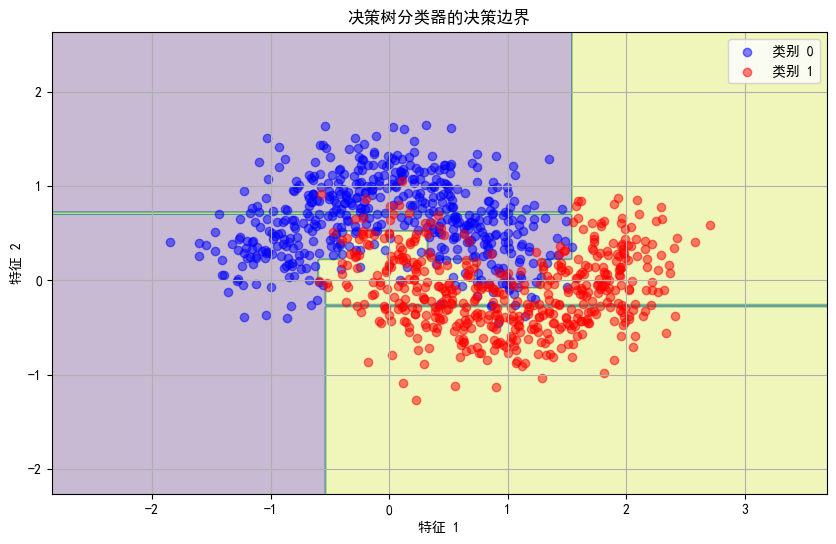

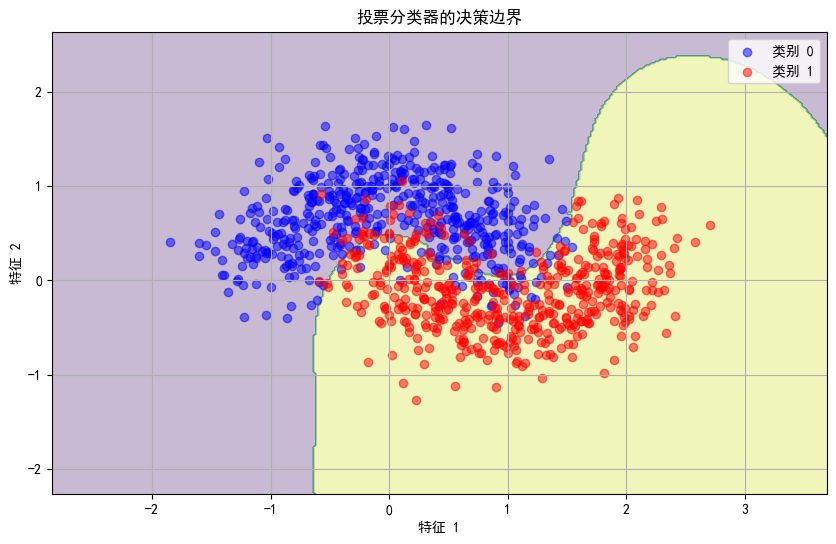

In [5]:
# 导入必要的库
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 创建三个基分类器
lr_clf = LogisticRegression(max_iter=1000)
svc_clf = SVC(kernel='rbf', probability=True)
dt_clf = DecisionTreeClassifier(max_depth=5)

# 训练三个基分类器
print("开始训练基分类器...")
lr_clf.fit(X_train, y_train)
svc_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
print("基分类器训练完成！")

# 在测试集上评估三个基分类器的性能
lr_pred = lr_clf.predict(X_test)
svc_pred = svc_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)

# 计算并打印每个基分类器的准确率
lr_acc = accuracy_score(y_test, lr_pred)
svc_acc = accuracy_score(y_test, svc_pred)
dt_acc = accuracy_score(y_test, dt_pred)

print(f"逻辑回归分类器准确率: {lr_acc:.4f}")
print(f"SVC分类器准确率: {svc_acc:.4f}")
print(f"决策树分类器准确率: {dt_acc:.4f}")

# 创建并训练投票分类器
voting_clf = VotingClassifier(
    estimators=[
        ('lr', lr_clf),
        ('svc', svc_clf),
        ('dt', dt_clf)
    ],
    voting='soft'  # 使用软投票（基于概率）
)
voting_clf.fit(X_train, y_train)

# 评估投票分类器的性能
voting_pred = voting_clf.predict(X_test)
voting_acc = accuracy_score(y_test, voting_pred)
print(f"投票分类器准确率: {voting_acc:.4f}")

# 可视化三个基分类器的决策边界
def plot_decision_boundary(clf, X, y, title):
    h = 0.02  # 网格步长
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', alpha=0.5, label='类别 0')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', alpha=0.5, label='类别 1')
    plt.title(title)
    plt.xlabel('特征 1')
    plt.ylabel('特征 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# 使用抽样数据可视化决策边界（完整数据集太大，可能会很慢）
sample_X = x[:sample_size]
sample_y = y[:sample_size]

# 在抽样数据上重新训练模型
lr_sample = LogisticRegression(max_iter=1000).fit(sample_X, sample_y)
svc_sample = SVC(kernel='rbf').fit(sample_X, sample_y)
dt_sample = DecisionTreeClassifier(max_depth=5).fit(sample_X, sample_y)

# 创建并训练样本投票分类器
voting_sample = VotingClassifier(
    estimators=[
        ('lr', lr_sample),
        ('svc', svc_sample),
        ('dt', dt_sample)
    ],
    voting='hard'  # 对于样本可视化使用硬投票（SVC没有probability=True）
).fit(sample_X, sample_y)

# 绘制决策边界
plot_decision_boundary(lr_sample, sample_X, sample_y, '逻辑回归分类器的决策边界')
plot_decision_boundary(svc_sample, sample_X, sample_y, 'SVC分类器的决策边界')
plot_decision_boundary(dt_sample, sample_X, sample_y, '决策树分类器的决策边界')
plot_decision_boundary(voting_sample, sample_X, sample_y, '投票分类器的决策边界')


In [7]:
# lr_pred = lr_clf.predict(X_test)
# svc_pred = svc_clf.predict(X_test)
# dt_pred = dt_clf.predict(X_test)

ensemble_pred = np.array((lr_pred + svc_pred + dt_pred) >= 2, dtype='int')

# 计算手动集成学习的准确率
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print("手动集成学习准确率:", ensemble_accuracy)

手动集成学习准确率: 0.9123


In [8]:
# 使用软投票方式创建集成分类器
# 软投票使用预测的概率而不是类标签进行投票
soft_voting_clf = VotingClassifier(
    estimators=[
        ('lr', lr_clf),
        ('svc', svc_clf),
        ('dt', dt_clf)
    ],
    voting='soft'  # 使用软投票
)

# 由于SVC默认不返回概率，我们需要确保已经设置probability=True
# 如果没有设置，可以重新训练
if not hasattr(svc_clf, 'predict_proba'): # 判断svc_clf是否具有predict_proba属性 hasattr代表判断是否具有某个属性
    print("重新训练SVC以启用概率预测")
    svc_clf = SVC(probability=True, gamma='auto')
    svc_clf.fit(X_train, y_train)
    
    # 更新集成分类器中的SVC
    soft_voting_clf.estimators[1] = ('svc', svc_clf)

# 训练软投票分类器
soft_voting_clf.fit(X_train, y_train)

# 评估软投票分类器
soft_voting_pred = soft_voting_clf.predict(X_test)
soft_voting_accuracy = accuracy_score(y_test, soft_voting_pred)
print("软投票集成分类器准确率:", soft_voting_accuracy)

# 比较各个分类器在测试集上的准确率
print("逻辑回归准确率:", accuracy_score(y_test, lr_pred))
print("SVC准确率:", accuracy_score(y_test, svc_pred))
print("决策树准确率:", accuracy_score(y_test, dt_pred))

软投票集成分类器准确率: 0.9078
逻辑回归准确率: 0.8535
SVC准确率: 0.9123
决策树准确率: 0.9054


In [9]:
print("手动集成准确率:", ensemble_accuracy)
print("软投票集成准确率:", soft_voting_accuracy)

手动集成准确率: 0.9123
软投票集成准确率: 0.9078


# BaggingClassifier

In [10]:
# 导入Bagging分类器
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# 创建决策树作为基分类器
base_clf = DecisionTreeClassifier(random_state=42)

# 创建Bagging分类器
# n_estimators: 基分类器的数量
# max_samples: 每个基分类器使用的样本数量，可以是整数或比例
# bootstrap: 是否使用有放回抽样
bagging_clf = BaggingClassifier(
    estimator=base_clf,
    n_estimators=100,  # 使用100个决策树
    max_samples=0.8,   # 每个基分类器使用80%的训练样本
    bootstrap=True,    # 使用有放回抽样
    oob_score=True,    # 使用oob score
    random_state=42
)

# 训练Bagging分类器
bagging_clf.fit(X_train, y_train)

#查oob score,oob score是没有抽样到的样本的准确率
print(f'oob score:{bagging_clf.oob_score_}')

# 在测试集上进行预测
bagging_pred = bagging_clf.predict(X_test)

# 评估Bagging分类器的准确率
bagging_accuracy = accuracy_score(y_test, bagging_pred)
print("Bagging分类器准确率:", bagging_accuracy)

# 比较Bagging分类器与单个决策树的准确率
print("单个决策树准确率:", accuracy_score(y_test, dt_pred))
print("Bagging分类器准确率:", bagging_accuracy)

oob score:0.902425
Bagging分类器准确率: 0.9038
单个决策树准确率: 0.9054
Bagging分类器准确率: 0.9038


In [13]:
base_clf = DecisionTreeClassifier(random_state=42)

# 创建Bagging分类器
# n_estimators: 基分类器的数量
# max_samples: 每个基分类器使用的样本数量，可以是整数或比例
# bootstrap: 是否使用有放回抽样
bagging_clf = BaggingClassifier(
    estimator=base_clf,
    n_estimators=100,  # 使用100个决策树
    max_samples=40000,   # 每个基分类器使用40000个样本
    bootstrap=False,    # 不使用有放回抽样
    oob_score=False,    # 不使用bootstrap时无法计算oob score
    random_state=42
)

# 训练Bagging分类器
bagging_clf.fit(X_train, y_train)

# 在测试集上进行预测
bagging_pred = bagging_clf.predict(X_test)

# 评估Bagging分类器的准确率
bagging_accuracy = accuracy_score(y_test, bagging_pred)

# 比较Bagging分类器与单个决策树的准确率
print("单个决策树准确率:", accuracy_score(y_test, dt_pred))
print("Bagging分类器准确率:", bagging_accuracy)

单个决策树准确率: 0.9054
Bagging分类器准确率: 0.8741


# njobs

In [15]:
# 添加njobs参数并统计训练时间
import time
from joblib import parallel_backend

# 创建一个决策树作为基分类器
base_clf = DecisionTreeClassifier(random_state=42)

# 不使用并行计算（单线程）
start_time_single = time.time()
bagging_clf_single = BaggingClassifier(
    estimator=base_clf,
    n_estimators=100,
    bootstrap=False,
    max_samples=40000,
    n_jobs=1,  # 单线程
    random_state=42
)
bagging_clf_single.fit(X_train, y_train)
single_time = time.time() - start_time_single

base_clf = DecisionTreeClassifier(random_state=42)

# 使用并行计算（多线程）
start_time_multi = time.time()
bagging_clf_multi = BaggingClassifier(
    estimator=base_clf,
    n_estimators=100,
    bootstrap=False,
    max_samples=40000,
    n_jobs=-1,  # 使用所有可用的CPU核心
    random_state=42
)
bagging_clf_multi.fit(X_train, y_train)
multi_time = time.time() - start_time_multi

# 预测并计算准确率
single_pred = bagging_clf_single.predict(X_test)
multi_pred = bagging_clf_multi.predict(X_test)

single_accuracy = accuracy_score(y_test, single_pred)
multi_accuracy = accuracy_score(y_test, multi_pred)

# 输出结果
print("单线程 Bagging 训练时间: {:.2f}秒".format(single_time))
print("多线程 Bagging 训练时间: {:.2f}秒".format(multi_time))
print("加速比: {:.2f}倍".format(single_time / multi_time))
print()
print("决策树(基分类器)准确率:", accuracy_score(y_test, dt_pred))
print("单线程 Bagging 准确率:", single_accuracy)
print("多线程 Bagging 准确率:", multi_accuracy)



单线程 Bagging 训练时间: 12.23秒
多线程 Bagging 训练时间: 1.43秒
加速比: 8.57倍

决策树(基分类器)准确率: 0.9054
单线程 Bagging 准确率: 0.8741
多线程 Bagging 准确率: 0.8741


# 加入bootstrap_features

In [16]:
# 创建一个决策树作为基分类器
base_clf = DecisionTreeClassifier(random_state=42)

# 创建Bagging分类器，使用决策树作为基本分类器
bagging_clf = BaggingClassifier(
    estimator=base_clf,
    n_estimators=100,  # 使用100个基分类器
    bootstrap=False,   
    max_samples=40000,   
    random_state=42,
    bootstrap_features=True
)

# 训练Bagging分类器
bagging_clf.fit(X_train, y_train)


# 预测
bagging_pred = bagging_clf.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_pred)

# 输出结果
print("决策树(基分类器)准确率:", accuracy_score(y_test, dt_pred))
print("Bagging集成准确率:", bagging_accuracy)

决策树(基分类器)准确率: 0.9054
Bagging集成准确率: 0.8751


# ExtraTreesClassifier

In [17]:
# 导入ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier

# 创建ExtraTrees分类器
extra_trees_clf = ExtraTreesClassifier(
    n_estimators=100,  # 使用100个树
    criterion='gini',  # 使用基尼不纯度作为分裂标准
    max_depth=None,    # 树的最大深度，None表示不限制
    min_samples_split=2,  # 分裂一个内部节点所需的最小样本数
    min_samples_leaf=1,   # 在叶节点处需要的最小样本数
    max_features='sqrt',  # 寻找最佳分割时考虑的特征数量
    bootstrap=False,      # 是否使用bootstrap抽样
    random_state=42,      # 随机种子，确保结果可复现
    n_jobs=-1             # 使用所有可用的CPU核心
)

# 训练ExtraTrees分类器
extra_trees_clf.fit(X_train, y_train)

# 预测
extra_trees_pred = extra_trees_clf.predict(X_test)
extra_trees_accuracy = accuracy_score(y_test, extra_trees_pred)

# 输出结果
print("决策树(基分类器)准确率:", accuracy_score(y_test, dt_pred))
print("Bagging集成准确率:", bagging_accuracy)
print("ExtraTrees集成准确率:", extra_trees_accuracy)

决策树(基分类器)准确率: 0.9054
Bagging集成准确率: 0.8751
ExtraTrees集成准确率: 0.9018


# adaBoosting

In [21]:
# 导入AdaBoost分类器
from sklearn.ensemble import AdaBoostClassifier

# 创建AdaBoost分类器
# 使用决策树作为基分类器
ada_boost_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  # 使用决策树桩作为基分类器
    n_estimators=100,  # 使用100个基分类器
    learning_rate=1.0,  # 学习率
    algorithm='SAMME',  # 使用SAMME.R算法，基于概率输出
    random_state=42  # 随机种子，确保结果可复现
)

# 训练AdaBoost分类器
ada_boost_clf.fit(X_train, y_train)

# 预测
ada_boost_pred = ada_boost_clf.predict(X_test)
ada_boost_accuracy = accuracy_score(y_test, ada_boost_pred)

# 输出结果
print("决策树(基分类器)准确率:", accuracy_score(y_test, dt_pred))
print("Bagging集成准确率:", bagging_accuracy)
print("ExtraTrees集成准确率:", extra_trees_accuracy)
print("AdaBoost集成准确率:", ada_boost_accuracy)


C:\Users\HDS\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


决策树(基分类器)准确率: 0.9054
Bagging集成准确率: 0.8751
ExtraTrees集成准确率: 0.9018
AdaBoost集成准确率: 0.9


# GBDT

决策树(基分类器)准确率: 0.9054
Bagging集成准确率: 0.8751
ExtraTrees集成准确率: 0.9018
AdaBoost集成准确率: 0.9
GBDT集成准确率: 0.9124


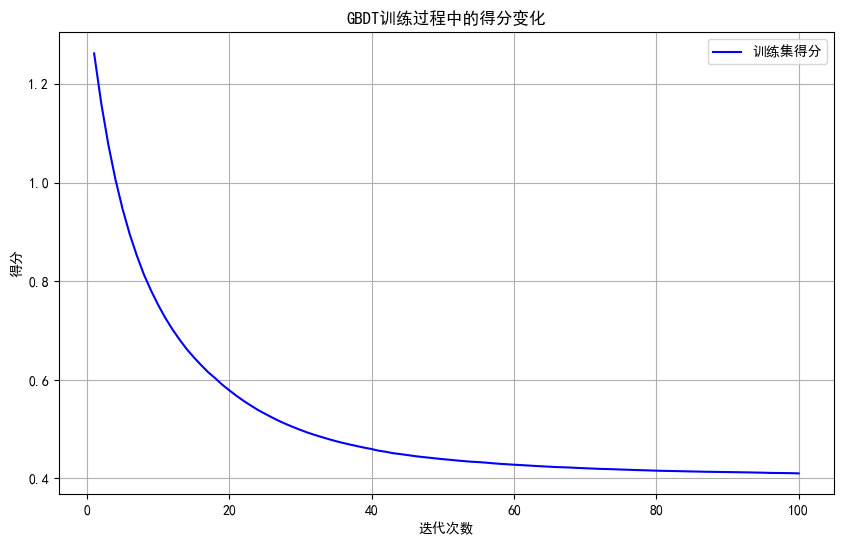

In [23]:
# 导入GBDT分类器
from sklearn.ensemble import GradientBoostingClassifier

# 创建GBDT分类器
gbdt_clf = GradientBoostingClassifier(
    n_estimators=100,  # 使用100个基分类器
    learning_rate=0.1,  # 学习率
    max_depth=3,       # 每个决策树的最大深度
    min_samples_split=2,  # 分裂内部节点所需的最小样本数
    min_samples_leaf=1,   # 叶节点所需的最小样本数
    subsample=1.0,     # 用于拟合个体基学习器的样本比例
    random_state=42    # 随机种子，确保结果可复现
)

# 训练GBDT分类器
gbdt_clf.fit(X_train, y_train)

# 预测
gbdt_pred = gbdt_clf.predict(X_test)
gbdt_accuracy = accuracy_score(y_test, gbdt_pred)

# 输出结果
print("决策树(基分类器)准确率:", accuracy_score(y_test, dt_pred))
print("Bagging集成准确率:", bagging_accuracy)
print("ExtraTrees集成准确率:", extra_trees_accuracy)
print("AdaBoost集成准确率:", ada_boost_accuracy)
print("GBDT集成准确率:", gbdt_accuracy)


# 绘制GBDT的训练过程中的损失函数变化
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(gbdt_clf.train_score_) + 1), gbdt_clf.train_score_, 'b-', label='训练集得分')
plt.xlabel('迭代次数')
plt.ylabel('得分')
plt.title('GBDT训练过程中的得分变化')
plt.legend()
plt.grid(True)
plt.show()
